In [ ]:
import btk
import matplotlib.pyplot as plt
import numpy as np

from blendxpz.simulations.sampling import FixedDistSampling
from blendxpz.simulations.ssi import ssi

%load_ext autoreload
%autoreload 2
%matplotlib inline

### Generating toy data

In [ ]:
isolated_galaxy = np.zeros((10, 5, 45, 45))

### Set up BTK generator

In [ ]:
pixel_shift_distance = 5

In [ ]:
CATALOG_PATHS = [
    "/sps/lsst/users/bbiswas/HSC_catalog/real_galaxy_catalog_26_extension_detrefined.fits",
    "/sps/lsst/users/bbiswas/HSC_catalog/real_galaxy_catalog_26_extension_detrefined_fits.fits",
]
survey = btk.survey.get_surveys("HSC")
stamp_size = survey.pixel_scale.value * 45
min_number = 1
max_number = 1
batch_size = 10
shift = pixel_shift_distance * survey.pixel_scale.value

survey = btk.survey.get_surveys("HSC")

catalog = btk.catalog.CosmosCatalog.from_file(CATALOG_PATHS, exclusion_level="none")
generator = btk.draw_blends.CosmosGenerator

index_range = [200000, len(catalog.table)]

seed = 13

linear_norm_coeff = 10000

sampling_function = FixedDistSampling(
    index_range=[100000, 150000],
    shift=shift,
    min_number=min_number,
    max_number=max_number,
    stamp_size=stamp_size,
    seed=seed,
    unique=False,
)


draw_generator = generator(
    catalog,
    sampling_function,
    survey,
    batch_size=batch_size,
    stamp_size=stamp_size,
    njobs=1,
    add_noise="all",
    verbose=False,
    seed=seed,
)

In [ ]:
ssi_galaxies, blend = ssi(draw_generator, isolated_galaxy)

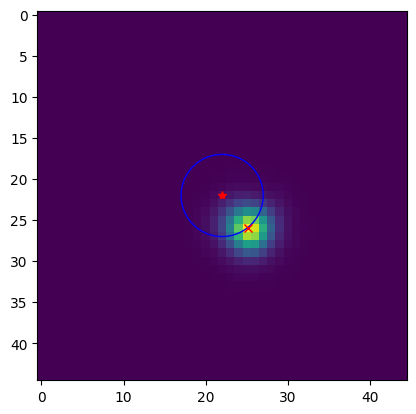

In [ ]:
show_galaxy_number = 1
# the center of galaxies should lie on the boundary of this rectangle
plt.imshow(ssi_galaxies[show_galaxy_number, 2])  # showing only r band


ax = plt.gca()

circle = plt.Circle((22, 22), 5, color="b", fill=False)

ax.add_patch(circle)

plt.plot(
    blend.catalog_list[show_galaxy_number]["x_peak"],
    blend.catalog_list[show_galaxy_number]["y_peak"],
    marker="x",
    color="r",
)


plt.plot(22, 22, marker="*", color="r");